![title](../NAG_logo.png)

# Exercises - Option Pricing

## European Call Options

Suppose that I want to write a European call option on 100,000 shares which are currently priced at £4.90. The price of this contract in the Black-Scholes model can be computed using the NAG functions `specfun.opt_bsm_price` and `specfun.opt_bsm_greeks`.  The additional parameters that are required to determine the option price are:
- the current risk-free interest rate, r = 5%
- the dividend rate, q = 0%
- the volatility of the stock price, = 20%
- the time to expiry, T = 20 weeks
- the strike price, X = £5.00

Note that rates in `specfun.opt_bsm_price` and `specfun.opt_bsm_greeks` are continuous annualised rates with 5% being entered as 0.05 and time is in years.

Calculate the Delta for this option, i.e. the sensitivity of the option price to small changes in the price of the underlying stock, using `specfun.opt_bsm_greeks`.

Suppose that I hedge this option contract by buying 100,000 Delta of the shares in question at the current price of £4.90 by borrowing at the current interest rate of 5%.

One week later the share price has risen to £4.95.
Calculate my net gain according to the Black-Scholes model as:

Net gain = price received for call option – price of call one week later +   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; price received for underlying stock one week later – repayment of principal used to buy stock with interest   

In [1]:
from naginterfaces.library import specfun

# helper function for printing
def f2str(x):
    return str(round(x,4))


calput = 'C'
x = [5.0]
s1 = 4.9
t = [20.0/52]
sigma = 0.2
r = 0.05
q = 0.0

out = specfun.opt_bsm_greeks(calput, x, s1, t, sigma, r, q)
p1 = out.p[0][0]
delta = out.delta[0][0]

print('Call price: ' + f2str(p1) )
print('Sensitivity of option price w.r.t underlying asset: ' + f2str(delta))

Call price: 0.2401
Sensitivity of option price w.r.t underlying asset: 0.5216


In [2]:
s2 = 4.95
t = [19.0/52]
out = specfun.opt_bsm_price(calput, x, s2, t, sigma, r, q)
p2 = out[0][0]
print('Price of call one week later: ' + f2str(p2) )

netgain  = ( p1 - p2 + delta*s2 - delta*s1 * (1 + r/52) ) * 100000

print('Net gain: ' + f2str(netgain))

Price of call one week later: 0.2584
Net gain: 525.3183


## Heston’s Stochastic Volatility Model

Heston’s Stochastic Volatility Model for a European option has a closed form solution in the sense that it can be represented as an integral. However, this must be evaluated numerically in order to give option prices or for the calibration of parameters from market data.

The solution given by Heston involves complex-valued functions with branch cuts and is not straightforward to evaluate numerically. In particular, errors occur when calculating the Heston prices for options with long times to maturity. Albrecher *et al.* discuss how to avoid errors when using Heston’s model.

A simple check of a function for evaluating the Heston option price can be made by using the parameters specified by Albrecher *et al.* for times to expiry of from 1 to 15 years. When the calculation is handled correctly, plotting the prices will show a
smooth monotonically increasing function of time to expiry, T.

In the NAG function for Heston’s Model (`specfun.opt_heston_price`) choose a Call option and set:
- Strike, X = 100
- Spot, S = 100
- Time, T = 1, 2, 3, …, 15
- Volatility of volatility, sigmav = 0.5751
- Mean reversion rate, kappa =1.5768
- Correlation, rho = -0.5711
- Current variance, var0 = 0.0175
- Long run variance, eta = 0.0398
- Risk-free interest rate, r = 0.025
- Dividend yield, q = 0.0
- Risk-aversion parameter, gamma = 1.0

Plot the output prices.

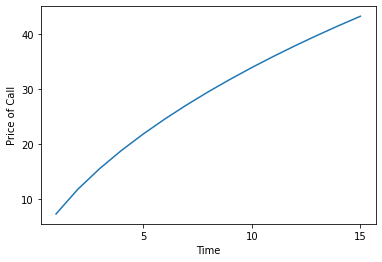

In [3]:
import numpy as np
from matplotlib import pyplot as plt

x = [100.0]
s = 100.0
t = np.arange(1.0, 16.0)
sigmav = 0.5751
kappa =1.5768
corr = -0.5711
var0 = 0.0175
eta = 0.0398
r = 0.025
q = 0.0
gamma = 1.0

p = specfun.opt_heston_price(calput, x, s, t, sigmav, kappa, corr, var0, eta, gamma, r, q)
                                     
plt.plot(t,p[0,:])
plt.xlabel('Time')
plt.ylabel('Price of Call')

# global option for font size
plt.rcParams.update({'font.size': 18})
plt.show()